# AUV Localization Using Dead Reckoning Techniques with IMU Sensor

In [1]:
#Load Libraries
import numpy as np            
import pandas as pd           
import matplotlib.pyplot as plt  
import scipy                  
import filterpy           

In [2]:
#Calculate Orientation

def calculate_orientation(a_x, a_y, a_z, previous_pitch, previous_roll):
    
    alpha = 0.9999
    
    theta_z = np.arctan2(a_y, a_z)
    theta_x = np.arctan2(a_x, np.sqrt(a_y**2 + a_z**2))
    pitch = (previous_pitch * alpha) + (theta_x * (1 - alpha))
    roll = (previous_roll * alpha) + (theta_z * (1 - alpha))
    
    return pitch, roll

In [3]:
#Calculate Velocity

def calculate_velocity(a_x, a_y, a_z, previous_velocity_x, previous_velocity_y, previous_velocity_z, delta_t):
    
    velocity_x = previous_velocity_x + a_x * delta_t
    velocity_y = previous_velocity_y + a_y * delta_t
    velocity_z = previous_velocity_z + a_z * delta_t
    velocity_info = np.linalg.norm(velocity_x) + np.linalg.norm(velocity_z)
    
    return velocity_x, velocity_y, velocity_z, velocity_info

In [12]:
#Calculate Position

def calculate_position(previous_position_x, previous_position_y, velocity_info, delta_t):
    
    position_x = previous_position_x + velocity_info * delta_t
    position_y = previous_position_y + velocity_info * delta_t

    return position_x, position_y

In [13]:
from filterpy.kalman import ExtendedKalmanFilter



In [28]:
# Test data

# Time parameters
total_time = 10  # seconds
delta_t = 0.1  # time step in seconds
time_steps = int(total_time / delta_t)

# Generate synthetic 1D accelerometer data in x direction
acceleration_data_x_1 = np.zeros(time_steps)
acceleration_data_x_1[:time_steps // 2] = 1  # Accelerate for the first half
acceleration_data_x_1[time_steps // 2:] = -1  # Decelerate for the second half

# Simple constant acceleration in y and z directions
acceleration_data_y_1 = np.ones(time_steps) * 0.5  # Constant acceleration in y
acceleration_data_z_1 = np.ones(time_steps) * 0.2  # Constant acceleration in z

# Combine into filtered_data_1
filtered_data_1 = [(ax, 0, 0) for ax, ay, az in zip(acceleration_data_x_1, acceleration_data_y_1, acceleration_data_z_1)]

In [29]:
########################
# Initialize variables #
########################

previous_position_x_1, previous_position_y_1 = 0, 0
#previous_position_x_2, previous_position_y_2 = 0, 0
#previous_position_x_b, previous_position_y_b = 0, 0

previous_velocity_x_1, previous_velocity_y_1, previous_velocity_z_1 = 0, 0, 0
#previous_velocity_x_2, previous_velocity_y_2, previous_velocity_z_2 = 0, 0, 0
#previous_velocity_x_b, previous_velocity_y_b, previous_velocity_z_b = 0, 0, 0

previous_pitch_1, previous_roll_1 = 0, 0
#previous_pitch_2, previous_roll_2 = 0, 0
#previous_pitch_b, previous_roll_b = 0, 0

velocities_x_1 = []
velocities_y_1 = []
velocities_z_1 = []

positions_x_1 = []
positions_y_1 = []

for i in range(time_steps):
    
    #filtered_data_1 = ekf(imu_data_1[i])
    #filtered_data_2 = ekf(imu_data_2[i])
    #filtered_data_b = ekf_blend(imu_data_1[i], imu_data_2[i])
    
    ##########################
    # Calculate DR for IMU 1 #
    ##########################
    
    
    a_x_1, a_y_1, a_z_1 = filtered_data_1[i]
    pitch_1, roll_1 = calculate_orientation(a_x_1, a_y_1, a_z_1, previous_pitch_1, previous_roll_1)
    velocity_x_1, velocity_y_1, velocity_z_1, velocity_info_1 = calculate_velocity(a_x_1, a_y_1, a_z_1, previous_velocity_x_1, previous_velocity_y_1, previous_velocity_z_1, delta_t)
    position_x_1, position_y_1 = calculate_position(previous_position_x_1, previous_position_y_1, velocity_info_1, delta_t)

    ##########################
    # Calculate DR for IMU 2 #
    ##########################
    
    #a_x_2, a_y_2, a_z_2 = filtered_data_2
    #pitch_2, roll_2 = calculate_orientation(a_x_2, a_y_2, a_z_2, previous_pitch_2, previous_roll_2)
    #velocity_x_2, velocity_y_2, velocity_z_2 = calculate_velocity(a_x_2, a_y_2, a_z_2, previous_velocity_x_2, previous_velocity_y_2, previous_velocity_z_2, delta_t)
    #position_x_2, position_y_2 = calculate_position(previous_position_x_2, previous_position_y_2, velocity_info_2, delta_t)
    
    #################################
    # Calculate DR for blended data #
    #################################
    
    #a_x_b, a_y_b, a_z_b = filtered_data_b
    #pitch_b, roll_b = calculate_orientation(a_x_b, a_y_b, a_z_b, previous_pitch_b, previous_roll_b)
    #velocity_x_b, velocity_y_b, velocity_z_b = calculate_velocity(a_x_b, a_y_b, a_z_b, previous_velocity_x_b, previous_velocity_y_b, previous_velocity_z_b, delta_t)
    #position_x_b, position_y_b = calculate_position(previous_position_x_b, previous_position_y_b, velocity_info_b, delta_t)
    
    ########################################
    # Update the previous values for IMU 1 #
    ########################################
    
    previous_pitch_1, previous_roll_1 = pitch_1, roll_1
    previous_velocity_x_1, previous_velocity_y_1, previous_velocity_z_1 = velocity_x_1, velocity_y_1, velocity_z_1
    previous_position_x_1, previous_position_y_1 = position_x_1, position_y_1
    
    ########################################
    # Update the previous values for IMU 2 #
    ########################################
    
    #previous_pitch_2, previous_roll_2 = pitch_2, roll_2
    #previous_velocity_x_2, previous_velocity_y_2, previous_velocity_z_2 = velocity_x_2, velocity_y_2, velocity_z_2
    #previous_position_x_2, previous_position_y_2 = position_x_2, position_y_2
    
    ###############################################
    # Update the previous values for blended data #
    ###############################################
    
    #previous_pitch_b, previous_roll_b = pitch_b, roll_b
    #previous_velocity_x_b, previous_velocity_y_b, previous_velocity_z_b = velocity_x_b, velocity_y_b, velocity_z_b
    #previous_position_x_b, previous_position_y_b = position_x_b, position_y_b
    
    
    velocities_x_1.append(velocity_x_1)
    velocities_y_1.append(velocity_y_1)
    velocities_z_1.append(velocity_z_1)
    
    positions_x_1.append(position_x_1)
    positions_y_1.append(position_y_1)
    

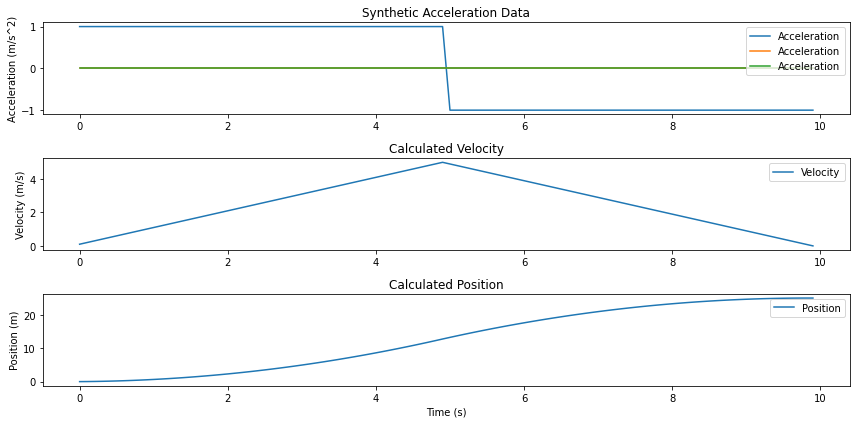

In [30]:
time_array = np.arange(0, total_time, delta_t)

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(time_array, filtered_data_1, label='Acceleration')
plt.title('Synthetic Acceleration Data')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time_array, velocities_x_1, label='Velocity')
plt.title('Calculated Velocity')
plt.ylabel('Velocity (m/s)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time_array, positions_x_1, label='Position')
plt.title('Calculated Position')
plt.ylabel('Position (m)')
plt.xlabel('Time (s)')
plt.legend()

plt.tight_layout()
plt.show()

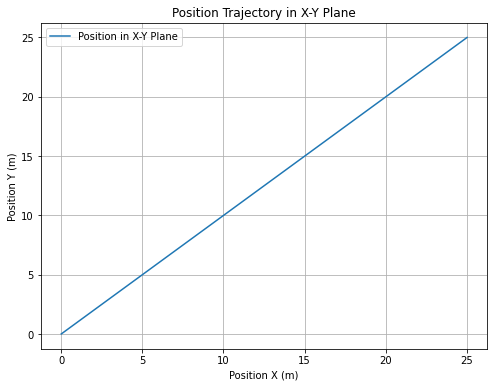

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(positions_x_1, positions_y_1, label='Position in X-Y Plane')
plt.title('Position Trajectory in X-Y Plane')
plt.xlabel('Position X (m)')
plt.ylabel('Position Y (m)')
plt.legend()
plt.grid(True)
plt.show()